## **Linear Regression with Python Scikit Learn**

## DATA


In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [73]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

In [74]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [75]:
s_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [76]:
s_data.shape

(25, 2)

In [77]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [78]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [79]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

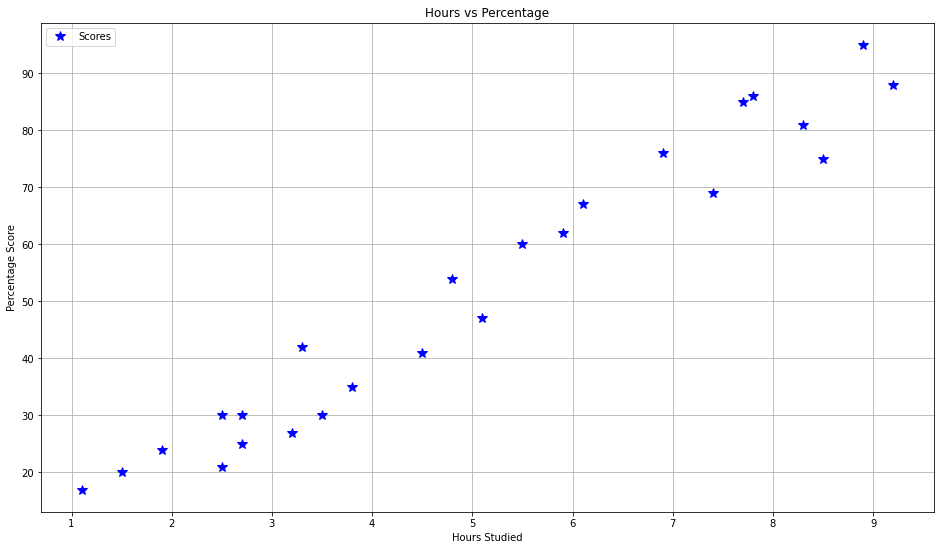

In [80]:
# Plotting the distribution of scores
plt.rcParams["figure.figsize"] = [16,9]
s_data.plot(x='Hours', y='Scores', style='*' , color = 'blue',markersize=10)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

In [81]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [82]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [83]:
X = s_data.iloc[:, :1].values  
y = s_data.iloc[:, 1].values  

In [93]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [95]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [86]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [87]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

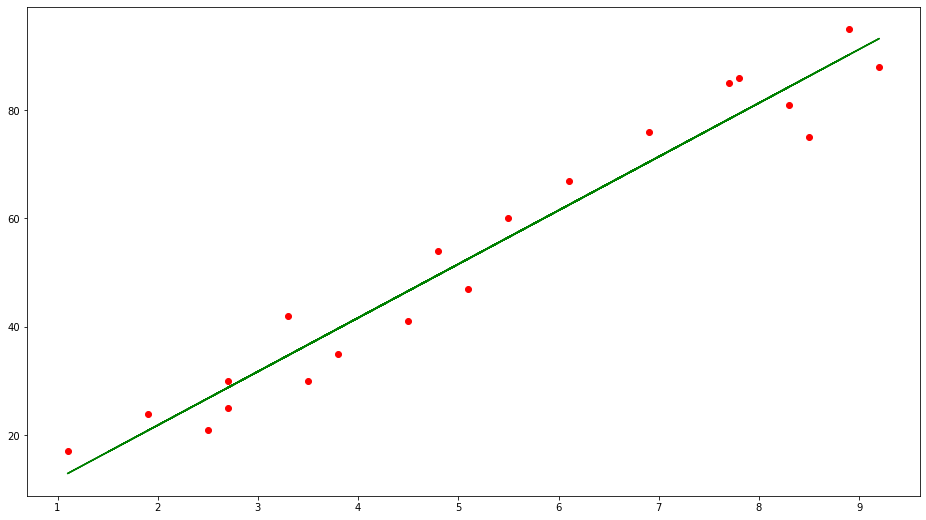

In [98]:
# Plotting the regression line
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, y_train,color='red')
plt.plot(X, line,color='green');
plt.Xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

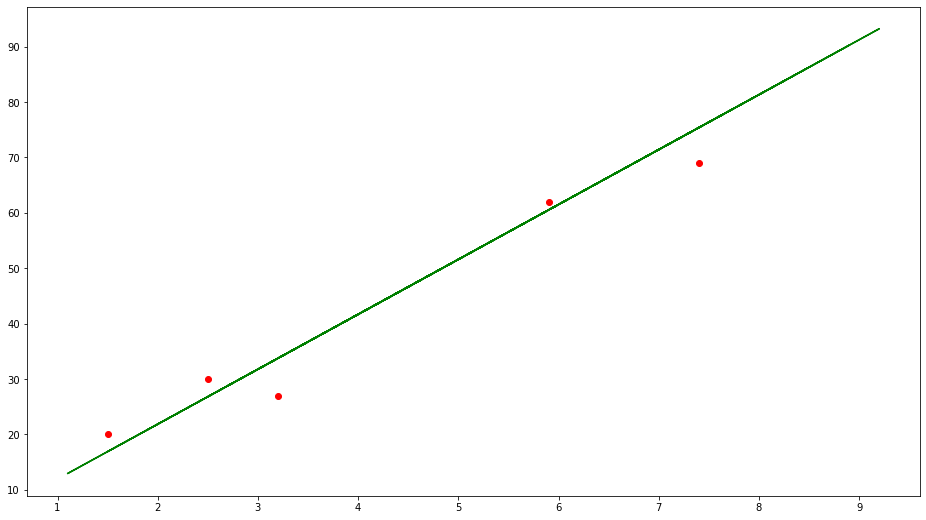

In [99]:
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test, y_test, color='red')
plt.plot(X, line,color='green');
plt.Xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [100]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [101]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [102]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [103]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [104]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score if a person studied for",hours,"hours is",own_pred[0])

No of Hours = 9.25
Predicted Score if a person studied for 9.25 hours is 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [105]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [3]:
pwd


'C:\\Users\\Dell\\Downloads'